# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [180]:
import os
import re
import emoji
import pandas as pd
import string

from emoji import is_emoji, distinct_emoji_list, emoji_list, emoji_count
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [181]:
# Use this space for any additional import statements you need
import glob

In [182]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
#sw = stopwords.words("english")
sw = stopwords.words(["english", "spanish"])

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
print(whitespace_pattern)
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

#for country in emoji.UNICODE_EMOJI : 
#    for em in emoji.UNICODE_EMOJI[country] : 
#        all_language_emojis.add(em)
        
# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here
    
    return(0)
    
def is_it_emoji(s):
    return is_emoji(s)
    #return(s in all_language_emojis)

def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)

def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(tokens)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


re.compile('\\s+')


In [183]:
text = '❤️word❤️👍'
print(is_emoji(text))
print(distinct_emoji_list(text))
print(emoji_list(text))
print(emoji_count(text))

print(is_it_emoji('❤️'))
print(contains_emoji(text))

False
['👍', '❤️']
[{'match_start': 0, 'match_end': 2, 'emoji': '❤️'}, {'match_start': 6, 'match_end': 8, 'emoji': '❤️'}, {'match_start': 8, 'match_end': 9, 'emoji': '👍'}]
3
True
True


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

## Function to Extract Followers into Dataframe

In [184]:
def follower_import(filenum):
    fol = pd.DataFrame()
    raw_file = os.listdir('C:/Users/drzag/twitter')[filenum]
    file = ('C:/Users/drzag/twitter/'+raw_file)
    fol = pd.read_csv(file, sep="\t", header=None)
    #CODE NOTE: "\t" was required to correctly read the file.
    fol.columns = ["name", "handle", "id_num", "loc", "date_joined", "followers", "friends", "desc"]
    fol['desc'] = fol['desc'].apply(str)
    fol.drop(fol[fol['desc'] == 'nan'].index, inplace = True)
    fol['desc_len'] = fol['desc'].str.len()
    return fol

print(os.listdir('C:/Users/drzag/twitter'))

['aboveandbeyond_followers.txt', 'didoofficial_followers.txt']


## Import Dido Follower Data w/ "follower_import()" Custom Function

In [185]:
dido_fol = follower_import(1)  # Argument is filenum in the directory: 0, 1, 2 etc
dido_fol.describe().T
print(dido_fol.info())
dido_fol.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60699 entries, 0 to 100893
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         60686 non-null  object
 1   handle       60699 non-null  object
 2   id_num       60699 non-null  int64 
 3   loc          45836 non-null  object
 4   date_joined  60699 non-null  object
 5   followers    60699 non-null  int64 
 6   friends      60699 non-null  int64 
 7   desc         60699 non-null  object
 8   desc_len     60699 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.6+ MB
None


,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len
0,RenElDepre,ElRenirey,1368982010920898561,"Santiago, Chile",2021-03-08 17:48:50+00:00,10,195,Lo que me Apasiona 😇 Lo que me Divierte😎 Lo qu...,81
3,CrackinLeftF⚽⚽t,DavidMarcusBen1,1307948922191609857,NaN,2020-09-21 07:45:08+00:00,6,57,'Flawed Genuis',15
4,W.K BRIAN,WKBrian7,1483097247604609025,JINJA,2022-01-17 15:22:29+00:00,0,3,"SAXOPHONE PLAYER,GOSPEL MUSIC WRITER,SINGER AN...",56


## Import Above & Beyond Follower Data

In [186]:
ab_fol = follower_import(0)  
ab_fol.describe().T
print(ab_fol.info())
ab_fol.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 100889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         65098 non-null  object
 1   handle       65125 non-null  object
 2   id_num       65125 non-null  int64 
 3   loc          44805 non-null  object
 4   date_joined  65125 non-null  object
 5   followers    65125 non-null  int64 
 6   friends      65125 non-null  int64 
 7   desc         65125 non-null  object
 8   desc_len     65125 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 5.0+ MB
None


,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len
0,DjSpace.booty,djspace_booty,1568710404314124288,"Los Angeles, CA",2022-09-10 21:18:25+00:00,3,35,LA DJ with a passion for house music & a nice ...,50
5,Felipe Rodrigues Figueiredo,FelipeR87147318,1568656781945061381,"São José do Rio Preto, Brasil",2022-09-10 17:46:38+00:00,3,331,See Off,7
6,Warner Powers,itswarnerpowers,1568338123477721089,NaN,2022-09-09 20:38:49+00:00,1,54,DJ & Producer,13


## Import Dido Song Titles and Lyrics

In [187]:
# Define relative path to folder containing the text files

files_folder = "/users/drzag/lyrics/dido"
files = []
dido_files_df = pd.DataFrame()

# Create a dataframe list and concatenate

files = [pd.read_csv(file, delimiter='\t') for file in glob.glob(os.path.join(files_folder ,"*.txt"))]
dido_files_df = pd.concat(files, axis = 1)

# EXTRACT TITLES TO NEW DF
dido_titles = []
dido_titles = dido_files_df.loc[1, :].values.tolist()
dido_titles_df = pd.DataFrame(dido_titles, columns = ['titles'])

# DELETE UNNEEDED ROWS
dido_files_df = dido_files_df.iloc[2: , : ]

dido_files_df.head()

,All I See lyrics,All You Want lyrics,Blackbird lyrics,Burnin' Love lyrics,Cards lyrics,Chances lyrics,Closer lyrics,Clouds Like Islands lyrics,Day Before We Went To War lyrics,Don't Believe In Love lyrics,...,This Land Is Mine lyrics,Those Were The Days lyrics,Together lyrics,Us 2 Little Gods lyrics,Walking By lyrics,What Am I Doing Here lyrics,White Flag lyrics,Who Makes You Feel lyrics,Worthless lyrics,You Don't Need A God lyrics
2,(feat. Pete Miser),I'd like to watch you sleep at night,He put the coffee in the cup and with milk he ...,I found no peace,"Oh, baby, baby, baby",All I did today,So leave your taxi waiting,"Pine forests, clouds like islands",All the pictures on the wall,I wanna go to bed,...,From behind these walls I hear your song,We were kids,Ladies and gentlemen,"Walking home, burnt and red","Keep me locked up, keep me shut in",There's an empty seat next to me everywhere I go,"I know you think that I shouldn't still love you,",I don't touch you the way I used to,I know what you came for,I can hear the music
3,I thought it was done when I packed my bags an...,to hear you breathe by my side,He added sugar and I never knew he liked it li...,"In the lies that I've told,",What happened to those days,Was wake up and watch TV,And turn and close my door,Spanish boys on mopeds,The sand lying on the floor,With arms around me,...,"Oh, sweet words",We'd know it all,We have begun,Sticky thin he said,You can but my mind still roams free,Even on the plane and on the sofa back at home,Or tell you that.,I don't call and write when im away,And I know when you'll leave,Just a few notes from a passing car
4,I picked the books I thought I should and clos...,And though sleep leaves me behind,He took his coat from the hook and his scarf a...,I'm only hurt by the blows that get withheld,When the doors were always open,Another wasted day,And sit back down where you were sitting,Vodka shots and charcoal fires,The bed upstairs still unmade,But wake up on my own,...,The music that you play lights up my world,We will live,We don't need the news,Let us go down in the woods,You can keep me caged,Life's too short for all this time,"But if I didn't say it, well I'd still have fe...",We don't make love as often as we did do,You came for my heart,And they can take me
5,And when I handed back the keys I thought that...,there's nowhere I'd rather be,And he put down a key and said I won't be need...,The sharper I get cut,And the music always played?,But that's alright with me,A little closer than before,"Palm trees, heat on the asphalt",The dust float in the light,Pretend,...,The sweetest that Iâve heard,We will love forever more,Just need the weather,Can you be careful? she said,You can tell me to be quiet,We could have spent as two,Where's the sense in that?,what couldn't wait now waits and usually goes ...,And it's lost to me,With heart opening speed
6,"No shame, no dirt, no surprises wait for me",And now our bed is oh so cold,And he turned and smiled as if that explained ...,The harder I get held,"Do you remember, darling",When shadows turn to clouds,And when you look that serious,Larks and lizards and wasps in the grass,The people just left,That I'm still sleeping,...,Could it be that Iâve been touched and turned,We were blind,We can tell the time,Us 2 little gods with the world at our feet,But I remember everything,I've seen it and I've held it,I promise I'm not trying to make your life harder,But listen and think when I say it,For I won't stop you,To somewhere not here


## Import Above & Beyond Song Titles and Lyrics

In [188]:
# Define relative path to folder containing the text files

files_folder = "/users/drzag/lyrics/abovebeyond"
files = []
ab_files_df = pd.DataFrame()

# Create a dataframe list and concatenate

files = [pd.read_csv(file, delimiter='\t') for file in glob.glob(os.path.join(files_folder ,"*.txt"))]
ab_files_df = pd.concat(files, axis = 1)

# EXTRACT TITLES ONLY
ab_titles = []
ab_titles = ab_files_df.loc[1, :].values.tolist()
ab_titles_df = pd.DataFrame(ab_titles, columns = ['titles'])

# DELETE UNNEEDED ROWS
ab_files_df = ab_files_df.iloc[2: , : ]

# DELETE DUPLICATE COLUMN
ab_files_df = ab_files_df.loc[:,~ab_files_df.columns.duplicated()]

ab_files_df.head()

,Air For Life lyrics,Alchemy lyrics,All Over The World lyrics,Almost Home lyrics,Alone Tonight lyrics,Alright Now lyrics,Alright Now (Above & Beyond Club Mix) lyrics,Always lyrics,Another Chance lyrics,Bittersweet & Blue lyrics,...,Sticky Fingers (Acoustic Version) lyrics,Sun & Moon lyrics,Sweetest Heart lyrics,Thing Called Love lyrics,Tightrope lyrics,Treasure lyrics,We're All We Need lyrics,With Your Hope lyrics,You Gotta Go lyrics,You Got To Go lyrics
2,NEED AIR FOR LIFE.....WE ALL BREATH.,(feat. Zoe Johnston),(feat. Alex Vargas),I am where I am,"Slipping sideways, silver stars collide",(feat. Justine Suissa),(with Justine Suissa),(feat. ZoÃ« Johnston),All I ask for is another chance,(feat. Richard Bedford),...,We painted the picture you want,(feat. Richard Bedford),(feat. ZoÃ« Johnston),(feat. Richard Bedford),When you're running out of tightrope,(feat. ZoÃ« Johnston),(feat. ZoÃ« Johnston),Connected to talk,"Dream on, little dreamer",(feat. Zoe Johnston)
3,NEED AIR FOR LIFE....NOW IN MY SOUL.,All these words you speak to me,Maybe I have waited for too long,Because I made it so,And fade away just like our love that died,I've lived a little,I've lived a little.,"Maybe, when I am hurting",All I ask for,I've got a photograph of you,...,I wanted it too,"It's raining, it's pouring",You have the sweetest heart,"There was a time, there was a place",And there's empty sky below,Treasure is measured in units of love,You tell me of a place you like to go,singing through a forest of ice,This is how it all begins,"Dream on, little dreamer! This is how it all b..."
4,NEED AIR FOREVER...,Are from a foreign land,Maybe I got caught up in the storm,I have ways to deceive myself,And there is nowhere in this universe to hide ...,I've loved a lot,I've loved a lot.,Maybe you will give a little time to me,All I ask for is another chance,Kept in a box of memories,...,But now there's something that I,A black sky is falling,NaN,But there was fear inside,Where'd you go?,Which means you may find you are rich,You say it will reach out and seize the sorrow,This slow motion moment is tumbling down,"Dream on, little dreamer",Move your feet ~ feel how sweet it is
5,IN ALL THAT I DO...,You're telling me that birds don't fly,And I sent you off so incomplete,And bind my soul,I've wrestled with angels all my life,I lost myself to you,I lost myself to you.,"And some day, when I really need you",All I ask for,And when I feel breakable,...,Would like you to do,It's cold tonight,NaN,A witty line to save my face,Please. Does anyone know?,Beyond your wildest dreams,And we always mean to act on what we say,Till we're lost inside the sound,This is how it all begins,"Dream on, little dreamer! Follow all of your s..."
6,NEED AIR FOR WHATEVER...THAT I DO.,How can it be that you love her?,Now your lonely call is haunting me,I was waiting to be found,It's always the halos and the wings that keep ...,We tied our dreams up,We tied our dreams up in a lovers knot,You will take me in your arms and you will say,I know the time will come,I take it out and look into your eyes,...,Get your sticky fingers out of my head,You gave me your answer,NaN,A parachute of pride,When you're running out of tightrope,Beyond your wildest dreams,"So come on, oh darling now... hurry, hurry, le...",It's your worst fall,Move your feet,You got to gather up what you need


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional)

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove punctuation other than emojis or hashtags
* Split on whitespace
* Remove stopwords

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [189]:
#SAMPLE OF PIPELINE PROCESSOR
'''# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 
'''

'# apply the `pipeline` techniques from BTAP Ch 1 or 5\n\nmy_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]\n\nlyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)\nlyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) \n\ntwitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)\ntwitter_data["num_tokens"] = twitter_data["tokens"].map(len) \n'

## Function to Preprocess Cells w/ Text into Cells w/ Lists of Tokens
### (Used with apply() to add a new column)

In [190]:
'''
Lyrics:
    Remove song titles
    Casefold to lowercase
    Remove punctuation
    Split on whitespace
    Remove stopwords (optional)
Removal of stopwords is up to you. 
Your descriptive statistic comparison will be different if you include stopwords,
though TF-IDF should still find interesting features for you.
'''

def lyric_pipeline(x):

    #Remove punctuation characters
    x = x.translate(str.maketrans('', '', string.punctuation))
    #Fold to lowercase
    x = x.lower()
    # starts with (feat.                #a few lyric began with a line for other featured artists
    x = re.sub(r'^(feat).*[a-z]$', ' ', x)
    # is nan
    x = re.sub(r'(nan)', ' ', x)
    #Split on whitespace AND Remove stopwords
    x = [w for w in x.split() if w not in (set(sw))]
    # USE THIS ONE FOR TOKENS
    return x
    # USE THIS ONE FOR STRING
    #return ' '.join(x)

'''
Twitter Descriptions
    Casefold to lowercase
    Remove punctuation other than emojis or hashtags
    Split on whitespace
    Remove stopwords
Removing stopwords seems sensible for the Twitter description data.
Remember to leave in emojis and hashtags, since you analyze those. 
'''
    
def twitter_pipeline(x):

    #Remove punctuation characters
    x = x.translate(str.maketrans('', '', string.punctuation.replace("#","")))
    #Fold to lowercase
    x = x.lower()
    # starts with (feat.                #a few lyric began with a line for other featured artists
    x = re.sub(r'^(feat).*[a-z]$', ' ', x)
    # is nan
    x = re.sub(r'(nan)', ' ', x)
    #Split on whitespace AND Remove stopwords
    x = [w for w in x.split() if w not in (set(sw))]
    # USE THIS ONE FOR TOKENS
    return x
    # USE THIS ONE FOR STRING
    #return ' '.join(x)


## Process Dido Twitter Desc into Tokens

In [191]:
dido_fol['with_hashes'] = dido_fol['desc'].apply(twitter_pipeline)
dido_fol.head(5)

,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len,with_hashes
0,RenElDepre,ElRenirey,1368982010920898561,"Santiago, Chile",2021-03-08 17:48:50+00:00,10,195,Lo que me Apasiona 😇 Lo que me Divierte😎 Lo qu...,81,"[apasiona, 😇, divierte😎, enamora🥰, enloquece, 🤑]"
3,CrackinLeftF⚽⚽t,DavidMarcusBen1,1307948922191609857,NaN,2020-09-21 07:45:08+00:00,6,57,'Flawed Genuis',15,"[flawed, genuis]"
4,W.K BRIAN,WKBrian7,1483097247604609025,JINJA,2022-01-17 15:22:29+00:00,0,3,"SAXOPHONE PLAYER,GOSPEL MUSIC WRITER,SINGER AN...",56,"[saxophone, playergospel, music, writersinger,..."
5,Claudia Rivera,drclamaria2023,1518593766332026880,Colombia,2022-04-25 14:13:27+00:00,2,62,"Psiquiatra independiente, madre amante de sus ...",72,"[psiquiatra, independiente, madre, amante, hij..."
6,Sean Toomey,toom57,149835666,"Greenwich, London",2010-05-30 10:31:07+00:00,200,818,I'm someone that enjoys life and smiles at eve...,108,"[im, someone, enjoys, life, smiles, every, opp..."


## Process Above and Beyond Twitter Desc into Tokens

In [192]:
ab_fol['with_hashes'] = ab_fol['desc'].apply(twitter_pipeline)
ab_fol.head(5)

,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len,with_hashes
0,DjSpace.booty,djspace_booty,1568710404314124288,"Los Angeles, CA",2022-09-10 21:18:25+00:00,3,35,LA DJ with a passion for house music & a nice ...,50,"[dj, passion, house, music, nice, ass]"
5,Felipe Rodrigues Figueiredo,FelipeR87147318,1568656781945061381,"São José do Rio Preto, Brasil",2022-09-10 17:46:38+00:00,3,331,See Off,7,[see]
6,Warner Powers,itswarnerpowers,1568338123477721089,NaN,2022-09-09 20:38:49+00:00,1,54,DJ & Producer,13,"[dj, producer]"
9,Pin Von Doom,pinxsierra,2969337526,NaN,2015-01-09 06:46:53+00:00,170,377,real mens mind their own business,33,"[real, mens, mind, business]"
10,kate ⭕️,dreamcranes,44555277,LDN,2009-06-04 05:40:11+00:00,71,104,I go hunting for witches / Heads are going to ...,50,"[go, hunting, witches, heads, going, roll]"


## Process Dido Lyrics into Tokens

In [193]:
for column in dido_files_df:
    dido_files_df[column] = dido_files_df[column].apply(str)
    dido_files_df[column] = dido_files_df[column].apply(lyric_pipeline)
dido_files_df.head(5)

,All I See lyrics,All You Want lyrics,Blackbird lyrics,Burnin' Love lyrics,Cards lyrics,Chances lyrics,Closer lyrics,Clouds Like Islands lyrics,Day Before We Went To War lyrics,Don't Believe In Love lyrics,...,This Land Is Mine lyrics,Those Were The Days lyrics,Together lyrics,Us 2 Little Gods lyrics,Walking By lyrics,What Am I Doing Here lyrics,White Flag lyrics,Who Makes You Feel lyrics,Worthless lyrics,You Don't Need A God lyrics
2,[],"[id, like, watch, sleep, night]","[put, coffee, cup, milk, filled]","[found, peace]","[oh, baby, baby, baby]",[today],"[leave, taxi, waiting]","[pine, forests, clouds, like, islands]","[pictures, wall]","[wanna, go, bed]",...,"[behind, walls, hear, song]",[kids],"[ladies, gentlemen]","[walking, home, burnt, red]","[keep, locked, keep, shut]","[theres, empty, seat, next, everywhere, go]","[know, think, shouldnt, still, love]","[dont, touch, way, used]","[know, came]","[hear, music]"
3,"[thought, done, packed, bags, walked, light]","[hear, breathe, side]","[added, sugar, never, knew, liked, like]","[lies, ive, told]","[happened, days]","[wake, watch, tv]","[turn, close, door]","[spanish, boys, mopeds]","[sand, lying, floor]","[arms, around]",...,"[oh, sweet, words]","[wed, know]",[begun],"[sticky, thin, said]","[mind, still, roams, free]","[even, plane, sofa, back, home]",[tell],"[dont, call, write, im, away]","[know, youll, leave]","[notes, passing, car]"
4,"[picked, books, thought, closed, door, behind]","[though, sleep, leaves, behind]","[took, coat, hook, scarf, hat]","[im, hurt, blows, get, withheld]","[doors, always, open]","[another, wasted, day]","[sit, back, sitting]","[vodka, shots, charcoal, fires]","[bed, upstairs, still, unmade]",[wake],...,"[music, play, lights, world]",[live],"[dont, need, news]","[let, us, go, woods]","[keep, caged]","[lifes, short, time]","[didnt, say, well, id, still, felt]","[dont, make, love, often]","[came, heart]",[take]
5,"[handed, back, keys, thought, free]","[theres, nowhere, id, rather]","[put, key, said, wont, needing]","[sharper, get, cut]","[music, always, played]","[thats, alright]","[little, closer]","[palm, trees, heat, asphalt]","[dust, float, light]",[pretend],...,"[sweetest, iâve, heard]","[love, forever]","[need, weather]","[careful, said]","[tell, quiet]","[could, spent, two]","[wheres, sense]","[couldnt, wait, waits, usually, goes, away]",[lost],"[heart, opening, speed]"
6,"[shame, dirt, surprises, wait]","[bed, oh, cold]","[turned, smiled, explained]","[harder, get, held]","[remember, darling]","[shadows, turn, clouds]","[look, serious]","[larks, lizards, wasps, grass]","[people, left]","[im, still, sleeping]",...,"[could, iâve, touched, turned]",[blind],"[tell, time]","[us, 2, little, gods, world, feet]","[remember, everything]","[ive, seen, ive, held]","[promise, im, trying, make, life, harder]","[listen, think, say]","[wont, stop]",[somewhere]


## Process Above and Beyond Lyrics into Tokens

In [194]:
for column in ab_files_df:
    ab_files_df[column] = ab_files_df[column].apply(str)
    ab_files_df[column] = ab_files_df[column].apply(lyric_pipeline)
ab_files_df.head(5)

,Air For Life lyrics,Alchemy lyrics,All Over The World lyrics,Almost Home lyrics,Alone Tonight lyrics,Alright Now lyrics,Alright Now (Above & Beyond Club Mix) lyrics,Always lyrics,Another Chance lyrics,Bittersweet & Blue lyrics,...,Sticky Fingers (Acoustic Version) lyrics,Sun & Moon lyrics,Sweetest Heart lyrics,Thing Called Love lyrics,Tightrope lyrics,Treasure lyrics,We're All We Need lyrics,With Your Hope lyrics,You Gotta Go lyrics,You Got To Go lyrics
2,"[need, air, lifewe, breath]",[],[],[],"[slipping, sideways, silver, stars, collide]",[],"[justine, suissa]",[],"[ask, another, chance]",[],...,"[painted, picture, want]",[],[],[],"[youre, running, tightrope]",[],[],"[connected, talk]","[dream, little, dreamer]",[]
3,"[need, air, lifenow, soul]","[words, speak]","[maybe, waited, long]",[made],"[fade, away, like, love, died]","[ive, lived, little]","[ive, lived, little]","[maybe, hurting]",[ask],"[ive, got, photograph]",...,[wanted],"[raining, pouring]","[sweetest, heart]","[time, place]","[theres, empty, sky]","[treasure, measured, units, love]","[tell, place, like, go]","[singing, forest, ice]",[begins],"[dream, little, dreamer, begins]"
4,"[need, air, forever]","[foreign, land]","[maybe, got, caught, storm]","[ways, deceive]","[nowhere, universe, hide, tonight]","[ive, loved, lot]","[ive, loved, lot]","[maybe, give, little, time]","[ask, another, chance]","[kept, box, memories]",...,"[theres, something]","[black, sky, falling]",[],"[fear, inside]","[whered, go]","[means, may, find, rich]","[say, reach, seize, sorrow]","[slow, motion, moment, tumbling]","[dream, little, dreamer]","[move, feet, feel, sweet]"
5,[],"[youre, telling, birds, dont, fly]","[sent, incomplete]","[bind, soul]","[ive, wrestled, angels, life]",[lost],[lost],"[day, really, need]",[ask],"[feel, breakable]",...,"[would, like]","[cold, tonight]",[],"[witty, line, save, face]","[please, anyone, know]","[beyond, wildest, dreams]","[always, mean, act, say]","[till, lost, inside, sound]",[begins],"[dream, little, dreamer, follow, signs]"
6,"[need, air, whateverthat]",[love],"[lonely, call, haunting]","[waiting, found]","[always, halos, wings, keep, blind]","[tied, dreams]","[tied, dreams, lovers, knot]","[take, arms, say]","[know, time, come]","[take, look, eyes]",...,"[get, sticky, fingers, head]","[gave, answer]",[],"[parachute, pride]","[youre, running, tightrope]","[beyond, wildest, dreams]","[come, oh, darling, hurry, hurry, lets, go]","[worst, fall]","[move, feet]","[got, gather, need]"


## Create the 4 Counters for Analysis

In [195]:
counter1 = Counter()
dido_fol['with_hashes'].map(counter1.update)
num_tokens1 = sum(counter1.values())

In [196]:
counter2 = Counter()
ab_fol['with_hashes'].map(counter2.update)
num_tokens2 = sum(counter2.values())

In [197]:
counter3=Counter()
for column in dido_files_df:
    dido_files_df[column].map(counter3.update)
num_tokens3 = sum(counter3.values())

In [198]:
counter4=Counter()
for column in ab_files_df:
    ab_files_df[column].map(counter4.update)
num_tokens4 = sum(counter4.values())

## Emoji Processing

In [199]:
dido_fol['has_emoji'] = dido_fol["desc"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [200]:
dido_fol[dido_fol.has_emoji].sample(10)[["desc","with_hashes"]]

,desc,with_hashes
73704,Love will find a way. Just a crazy Ziam Shipper ✌,"[love, find, way, crazy, ziam, shipper, ✌]"
24637,ΜΟΥΑΡΣΗ ΤΟ ΠΟΔΟΣΦΕΡΟ ⚽🏃 👽🏡🗼⚽⚾🚘🚜⛽🚧🚀🎸🎷🎧🚦👾🎺🎻🎤📱🌞🌝🌜🌓🌎,"[μουαρση, το, ποδοσφερο, ⚽🏃, 👽🏡🗼⚽⚾🚘🚜⛽🚧🚀🎸🎷🎧🚦👾🎺🎻..."
3818,LFC 🔴 | NYC | 21,"[lfc, 🔴, nyc, 21]"
33902,〽️Music is the energy within our soul and hear...,"[〽️music, energy, within, soul, hearts〽️]"
11916,Press reset on you're work-life balance & star...,"[press, reset, youre, worklife, balance, start..."
59327,fresh graduated ELECTRICAL ENGINEER © .. ¶ GET...,"[fresh, graduated, electrical, engineer, ©, ¶,..."
78860,Love My amazing daughter Shaya-Faith❤ Lovee My...,"[love, amazing, daughter, shayafaith❤, lovee, ..."
5701,"esposo y papá 24/7. ya nací, ya crecí, ya me r...","[esposo, papá, 247, nací, crecí, reprodujedebe..."
99178,Analizo hechos más que opiniones. Amante del c...,"[analizo, hechos, opiniones, amante, café, ☕, ..."
14887,"Time passes in moments,moments which rushing p...","[time, passes, momentsmoments, rushing, past, ..."


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: I suspect that my code would be criticized for not being compartmentalized enough into functions and pipelines.  I enjoy coding that's easy to follow and linear, but I realize that if I were to code applications and multiple use scenarios, I would have to clean up my functions and modularize.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [201]:
#def descriptive_stats(df_col, top_x_tokens = 10, verbose=True):
def descriptive_stats(counter, top_x_tokens = 10, verbose=True):    
    #counter = Counter()
    #df_col.map(counter.update)
    num_tokens = sum(counter.values())
    num_unique_tokens = len(counter.keys())
    num_characters=0
    for key, value in counter.items():
        char = (len(key))*value
        num_characters = num_characters + char
    lexical_diversity = num_unique_tokens/num_tokens

    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The ten most common tokens are:")
        print(counter.most_common(top_x_tokens))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [202]:
descriptive_stats(counter1)

There are 464989 tokens in the data.
There are 116816 unique tokens in the data.
There are 2900157 characters in the data.
The lexical diversity is 0.251 in the data.
The ten most common tokens are:
[('love', 4612), ('music', 4164), ('life', 2979), ('im', 2773), ('fan', 1970), ('lover', 1611), ('follow', 1333), ('like', 1308), ('live', 1278), ('world', 1138)]


[464989, 116816, 0.25122314721423517, 2900157]

In [203]:
descriptive_stats(counter2)

There are 441828 tokens in the data.
There are 114566 unique tokens in the data.
There are 2746611 characters in the data.
The lexical diversity is 0.259 in the data.
The ten most common tokens are:
[('music', 6906), ('dj', 3330), ('love', 2911), ('life', 2570), ('producer', 2506), ('•', 1970), ('trance', 1841), ('im', 1671), ('house', 1489), ('lover', 1301)]


[441828, 114566, 0.25929999909467033, 2746611]

In [204]:
descriptive_stats(counter3)

There are 8759 tokens in the data.
There are 1440 unique tokens in the data.
There are 41568 characters in the data.
The lexical diversity is 0.164 in the data.
The ten most common tokens are:
[('dont', 179), ('love', 177), ('im', 141), ('see', 110), ('youre', 101), ('never', 97), ('ive', 93), ('home', 86), ('go', 83), ('time', 78)]


[8759, 1440, 0.16440232903299462, 41568]

In [205]:
descriptive_stats(counter4)

There are 5164 tokens in the data.
There are 1039 unique tokens in the data.
There are 25159 characters in the data.
The lexical diversity is 0.201 in the data.
The ten most common tokens are:
[('im', 106), ('love', 101), ('know', 87), ('youre', 75), ('get', 72), ('way', 51), ('time', 51), ('dont', 50), ('got', 45), ('go', 43)]


[5164, 1039, 0.2012006196746708, 25159]

Q: what observations do you make about these data? 

A: Obviously, the follower corpora are much larger than lyrics corpora.  Follower corpora seem to have more unique tokens.  In particular, "trance", "house", and "dj" for the Above & Beyond followers reveals the genre of this artist (i.e. House music with Trance qualities often played by DJs).  "I'm" and "Love" appear frequently in lyrics.  No suprise there.  Also, lexical diversity is lower with lyrics than with follower descriptions, no doubt due to the repeating nature of choruses and verses in songs.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

## Tokens Must Appear 5 Times in Every Corpora

In [206]:
counter1_2 = {key:value for (key, value) in counter1.items() if value >= 5}
counter2_2 = {key:value for (key, value) in counter2.items() if value >= 5}
counter3_2 = {key:value for (key, value) in counter3.items() if value >= 5}
counter4_2 = {key:value for (key, value) in counter4.items() if value >= 5}
#final_dict = {x:counter1_2[x] for x in counter1_2 if x in counter2_2}
final_dict = {x:[counter1_2[x]/num_tokens1,
                 counter2_2[x]/num_tokens2,
                 counter3_2[x]/num_tokens3,
                 counter4_2[x]/num_tokens4]\
              for x in counter1_2 if (x in counter2_2) & (x in counter3_2) & (x in counter4_2)}

## Compute Ratios Between Corpora (showing token ratios for one comparison)

In [207]:
new = pd.DataFrame(final_dict, index = ['didotwit', 'abtwit', 'didolyr', 'ablyr'] ).T
new['didotwit_v_abtwit'] = new['didotwit']/new['abtwit']
new.sort_values(by='didotwit_v_abtwit', ascending=False)

,didotwit,abtwit,didolyr,ablyr,didotwit_v_abtwit
rain,0.000127,0.000045,0.000685,0.001162,2.803061
lonely,0.000077,0.000029,0.000685,0.001936,2.631296
sing,0.000275,0.000109,0.002398,0.003098,2.533841
ill,0.000482,0.000206,0.007535,0.004260,2.338930
smile,0.000484,0.000217,0.001713,0.001549,2.227008
...,...,...,...,...,...
turn,0.000088,0.000156,0.002283,0.000968,0.564606
darling,0.000017,0.000032,0.000913,0.002517,0.542966
room,0.000077,0.000156,0.000913,0.002711,0.495751
low,0.000039,0.000097,0.000799,0.000968,0.397754


## Compute Ratios Between All Corpora Combinations and Extract Tokens

In [208]:
new['didotwit_v_abtwit'] = new['didotwit']/new['abtwit']
new['didotwit_v_didolyr'] = new['didotwit']/new['didolyr']
new['didotwit_v_ablyr'] = new['didotwit']/new['ablyr']
new['abtwit_v_didolyr'] = new['abtwit']/new['didolyr']
new['abtwit_v_ablyr'] = new['abtwit']/new['ablyr']
new['didolyr_v_ablyr'] = new['didolyr']/new['ablyr']


didotwit_v_abtwit = new.sort_values(by='didotwit_v_abtwit', ascending=False).index
print(didotwit_v_abtwit)
didotwit_v_didolyr = new.sort_values(by='didotwit_v_didolyr', ascending=False).index
didotwit_v_ablyr = new.sort_values(by='didotwit_v_ablyr', ascending=False).index
abtwit_v_didolyr = new.sort_values(by='abtwit_v_didolyr', ascending=False).index
abtwit_v_ablyr = new.sort_values(by='abtwit_v_ablyr', ascending=False).index
didolyr_v_ablyr = new.sort_values(by='didolyr_v_ablyr', ascending=False).index

zipped = list(zip(didotwit_v_abtwit, didotwit_v_didolyr, didotwit_v_ablyr, abtwit_v_didolyr, abtwit_v_ablyr, didolyr_v_ablyr))
df = pd.DataFrame(zipped, columns=['didotwit_v_abtwit', 'didotwit_v_didolyr', 'didotwit_v_ablyr',
                                  'abtwit_v_didolyr', 'abtwit_v_ablyr', 'didolyr_v_ablyr'])
print(df.head(15))
df.tail(15)

Index(['rain', 'lonely', 'sing', 'ill', 'smile', 'hurt', 'loved', 'wont',
       'eyes', 'youve',
       ...
       'made', 'lets', 'stay', 'lost', 'night', 'turn', 'darling', 'room',
       'low', 'house'],
      dtype='object', length=161)
   didotwit_v_abtwit didotwit_v_didolyr didotwit_v_ablyr abtwit_v_didolyr  \
0               rain               live              new            house   
1             lonely               life             live             live   
2               sing              since             life            since   
3                ill               good               us             life   
4              smile            forever             make             good   
5               hurt              dream       everything          forever   
6              loved                new             back              new   
7               wont              world            world            dream   
8               eyes              black             give         

,didotwit_v_abtwit,didotwit_v_didolyr,didotwit_v_ablyr,abtwit_v_didolyr,abtwit_v_ablyr,didolyr_v_ablyr
146,make,away,ive,standing,gonna,lonely
147,sleep,wouldnt,clouds,leave,theres,gonna
148,hours,id,theres,walk,came,room
149,around,oh,came,ill,standing,cold
150,youd,youre,plans,tonight,hold,taking
151,made,plans,room,oh,wouldnt,sleep
152,lets,couldnt,hold,couldnt,ive,good
153,stay,sun,youre,enough,youd,eyes
154,lost,leave,hours,youve,cold,dream
155,night,hand,couldnt,wouldnt,couldnt,ever


## Only Compare Twitter Follower Descriptions

In [168]:
counter1_2 = {key:value for (key, value) in counter1.items() if value >= 10}
counter2_2 = {key:value for (key, value) in counter2.items() if value >= 10}
#final_dict = {x:counter1_2[x] for x in counter1_2 if x in counter2_2}
final_dict = {x:[counter1_2[x]/num_tokens1,
                 counter2_2[x]/num_tokens2]\
              for x in counter1_2 if (x in counter2_2)}
#              for x in counter1_2 if (x in counter2_2) & (x in counter3_2) & (x in counter4_2)}

In [169]:
new = pd.DataFrame(final_dict, index = ['didotwit', 'abtwit'] ).T
new['didotwit_v_abtwit'] = new['didotwit']/new['abtwit']
print(new.sort_values(by='didotwit_v_abtwit', ascending=False).head(15))
new.sort_values(by='didotwit_v_abtwit', ascending=False).tail(15)

            didotwit    abtwit  didotwit_v_abtwit
mummy       0.000252  0.000029           8.551712
xxx         0.000178  0.000025           7.169617
mum         0.000783  0.000127           6.176236
justin      0.000168  0.000027           6.176236
hija        0.000138  0.000023           6.081217
♥           0.001206  0.000199           6.057463
xx          0.000280  0.000048           5.882130
mamá        0.000243  0.000043           5.651131
daughters   0.000125  0.000023           5.511103
adore       0.000131  0.000025           5.269237
è           0.000226  0.000043           5.251051
followed    0.000232  0.000045           5.131027
che         0.000243  0.000048           5.112928
cantante    0.000148  0.000029           5.043317
periodista  0.000245  0.000050           4.923713


,didotwit,abtwit,didotwit_v_abtwit
bass,0.000101,0.000799,0.126513
dj,0.000944,0.007537,0.125265
#house,0.000022,0.000177,0.121819
electronic,0.000232,0.001965,0.118226
trance,0.000490,0.004167,0.117677
house,0.000368,0.003370,0.109122
mixes,0.000022,0.000217,0.098978
dubstep,0.000032,0.000380,0.084838
festivals,0.000034,0.000407,0.084461
electrónica,0.000084,0.001041,0.080560


## Only Compare Lyrics

In [170]:
counter3_2 = {key:value for (key, value) in counter3.items() if value >= 5}
counter4_2 = {key:value for (key, value) in counter4.items() if value >= 5}
#final_dict = {x:counter1_2[x] for x in counter1_2 if x in counter2_2}
final_dict = {x:[counter3_2[x]/num_tokens3,
                 counter4_2[x]/num_tokens4]\
              for x in counter3_2 if (x in counter4_2)}
#              for x in counter1_2 if (x in counter2_2) & (x in counter3_2) & (x in counter4_2)}

In [171]:
new = pd.DataFrame(final_dict, index = ['didolyr', 'ablyr'] ).T
new['didolyr_v_ablyr'] = new['didolyr']/new['ablyr']
print(new.sort_values(by='didolyr_v_ablyr', ascending=False).head(15))
new.sort_values(by='didolyr_v_ablyr', ascending=False).tail(15)

         didolyr     ablyr  didolyr_v_ablyr
enough  0.007649  0.001162         6.583476
think   0.005937  0.001162         5.109563
wont    0.006736  0.001549         4.348042
us      0.004795  0.001162         4.126955
let     0.008791  0.002130         4.126955
days    0.004681  0.001162         4.028694
wanna   0.004224  0.001162         3.635651
back    0.006736  0.001936         3.478434
last    0.004224  0.001356         3.116272
see     0.012559  0.004067         3.088198
leave   0.005823  0.001936         3.006782
cause   0.002854  0.000968         2.947825
new     0.002740  0.000968         2.829912
home    0.009818  0.003679         2.668557
walk    0.003539  0.001356         2.610931


,didolyr,ablyr,didolyr_v_ablyr
lonely,0.000685,0.001936,0.353739
room,0.000913,0.002711,0.336894
gonna,0.001370,0.004067,0.336894
cold,0.001028,0.003098,0.331630
taking,0.000571,0.001743,0.327536
sleep,0.001256,0.004067,0.308820
good,0.001827,0.006003,0.304292
eyes,0.001256,0.004454,0.281966
dream,0.000799,0.002905,0.275130
ever,0.001941,0.008133,0.238633


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: Comparison of follower descriptions to lyrics seems challenging for a few reasons.  First, lyrics do not generally contain the unique words, characters, emojis, and other creative aspects that follow descriptions contain.  The lyrics corpora were also much smaller, and in English only.  Lyrics are repetitive too, limiting word richness.  So when we applied a minimum count of words to all corpora, we ended up with a more generic and bland set of words that appeared in more corpora.  Unique words were not as distinctive, perhaps appearing more by chance.

That said, a few words still popped out.  The word "darling" in particular seems much more common in both Above and Beyond Follower Descriptions and Lyrics.  It's a peculiar word is probably a unique signature for certain songs.  The word "tonight" is also much more likely to appear in lyrics than in twitter followers descriptions.

When we compare twitter to twitter and lyrics to lyrics, the differences become much more pronounced.  In Twitter, Above & Beyond followers are much more likely to mention music styles such as "techno", "rave", "djproducer", "mixes", "dubstep", and "house".  For Dido followers, "mummy", "mum", "daughters", and "mama" are all much more common, suggesting a different follower type for this artist.  xx and heart emoji were also very common for Dido.  These followers seem more emotive, and talking to rather than about the artist.

Comparing lyrics to lyrics, there appear to be a higher instance of rueful, melencholic words in A&B lyrics: "lonely", "cold", "sleep", "dream", "black", "forever", "ever", "eyes".  It seems much moodier than the fairly neutral words that are more common in Dido lyrics: "enough", "think", "won't", "us", "let", "days" and so on.



## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [65]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    
    # the BUSINESS END of the function
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
# This function creates a SERIES object with word frequency values that can be passed     
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

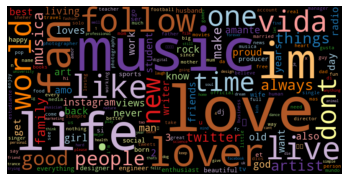

In [137]:
wordcloud(counter1)

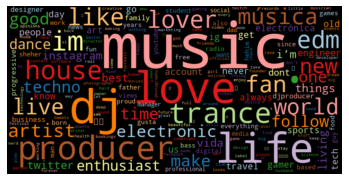

In [138]:
wordcloud(counter2)

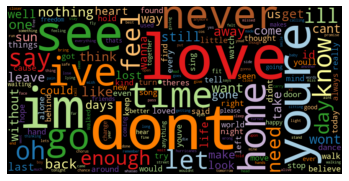

In [139]:
wordcloud(counter3)

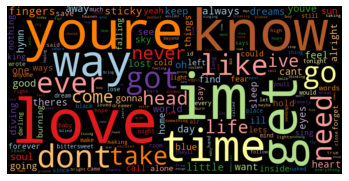

In [140]:
wordcloud(counter4)

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: I've never been a huge fan of word clouds.  The frequency analyses offer much more richness.  That said, one can certainly see a common theme of love, music, life in the follower corpora, and in lyrics.  As in the frequency analysis, we also see music style words more commonly in the twitter data for Above & Beyond followers: "house", "dj", "trance", "electronic", etc.